# Data and Sampling Distribution

Note: In general Data Scientist need not worry about the theoretical nature of a population and instead should focus on the sampling procedures and the data at hand. There are some notable exceptions: data that is generated from physical processes can be modeled. For example a coin flip: this follows a binomial distribution. Any real-life binomial situation(buy or don't buy, fraud or no fraud, click or don't click) can be modeled effectively by a coin(with modified probability of landing heads).

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.utils import resample
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

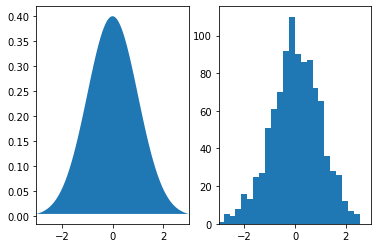

In [16]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2)

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_xlim(-3, 3)
ax.set_position

plt.show()

## Random Sampling and Sample Bias

Important key terms: 
- **Random and stratisfied sampling**
- **Population**
- **Bias**
- **Sample bias**

Data quality is often greater than data quantity when making estimates or model based on a sample. In data science this means **completeness, consistency of format, cleaniness, and accuracy of data points**. Statistics add the notion of **representativeness**. Classic example: Literary Digest poll of 1963 that predicted a victory of Alf Landon over Franklin Roosevelt: they polled the subscribers plus additional lists of people, totaling 10 million people. George Gallup biweekly polls of just 2000 people and accuratly predicted a Roosevelt victory. 

A classic scenario when size matter is when the data is not only big but sparse as well. For example search queries recieved by Google. There are over 150,000 words and Google processes trillions of queries a day, leading to a matrices mostly made of zeros.

## Selection Bias

Important key terms: 
- **Selection bias**(cherry picking, time intervals, stopping experiments, regression to the mean)
- **Data snooping** (tossing coin 10 times vs. 20 people tossing coin 10 times)
- **Vast search effect**

In data science, selection bias is something to worry about when you repeatly review a large data set. Using a holdout set or more than one to validate performance.

## Sampling Distribution of a Statistic
Important key terms: 
- **Sample statistic**
- **Data and sample distribution**
- **Central limit theorem**
- **Standard error**(variability of a sample statistic over many statitics)

Note: The distribution of a sample statistic such as the mean is likely to be more regular and bell shaped than the distribution of the data itself.

In [18]:
LOANS_INCOME = DATA / 'loans_income.csv'

### Plotting histogram of annual income of loan applicants, mean of 5 applicants, mean of 20 applicants

In [24]:
loans = pd.read_csv(LOANS_INCOME)
loans.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [74]:
sample_loans = pd.DataFrame({
    'income': loans['x'].sample(1000),
    'type': 'Data',
})
sample_loans_5 = pd.DataFrame({
    'income': [loans['x'].sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})
sample_loans_20 = pd.DataFrame({
    'income': [loans['x'].sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_loans, sample_loans_5, sample_loans_20])
results.head()

,income,type
26746,54375.0,Data
20554,32000.0,Data
49319,15803.0,Data
42817,49000.0,Data
31261,104004.0,Data


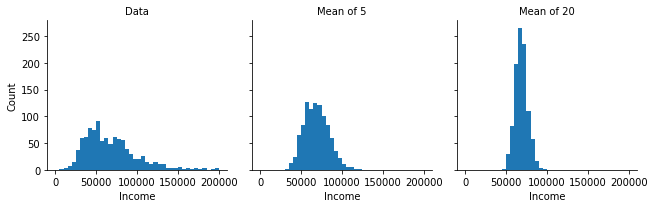

In [79]:
g = sns.FacetGrid(results, col='type')
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()